In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
tf.random.set_seed(1)

In [276]:
dataset=pd.read_csv('./train_mode3_Comb.csv')

#데이터를 8:2로 분할    
train_mode3_train=dataset.sample(frac=0.8,random_state=0) 
train_mode3_test = dataset.drop(train_mode3_train.index)

    

print("train")
print(train_mode3_train.shape)

print("test")
print(train_mode3_test.shape)

train
(223313, 15)
test
(55828, 15)


In [277]:
print(dataset)

        Unnamed: 0  Base duration gas admission  DVT control air press (PT43)  \
0            26454                    -1.196966                      1.001537   
1            11827                     0.093222                      0.989186   
2             1825                    -0.387570                      0.036987   
3            24468                     0.161243                      0.953338   
4             1160                    -0.639344                     -0.108925   
...            ...                          ...                           ...   
279136       15796                     0.233912                      0.982065   
279137         424                    -0.350379                     -0.080729   
279138       14120                     0.383166                      0.995688   
279139        6819                    -0.090286                     -0.069385   
279140       12104                     0.078786                     -0.069396   

        Engine Load percent

In [278]:
train_mode3_train.pop('Unnamed: 0')
train_mode3_test.pop('Unnamed: 0')


10         1840
21         7227
27         1893
37         4458
40          422
          ...  
279098    11551
279115    12668
279121     2513
279127    20614
279135     2842
Name: Unnamed: 0, Length: 55828, dtype: int64

In [279]:
train_labels = train_mode3_train.pop('state')
test_labels = train_mode3_test.pop('state')


In [280]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(29, activation='relu', input_shape=[len(train_mode3_train.keys())]),
    keras.layers.Dense(29, activation='relu'),
    keras.layers.Dense(29, activation='relu'),  
    keras.layers.Dense(1)
  ])

              
  optimizer = tf.keras.optimizers.RMSprop(0.003)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [281]:
model1=build_model()
model2=build_model()
model3=build_model()



model1.summary()


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_252 (Dense)            (None, 29)                406       
_________________________________________________________________
dense_253 (Dense)            (None, 29)                870       
_________________________________________________________________
dense_254 (Dense)            (None, 29)                870       
_________________________________________________________________
dense_255 (Dense)            (None, 1)                 30        
Total params: 2,176
Trainable params: 2,176
Non-trainable params: 0
_________________________________________________________________


In [282]:
EPOCHS=100
#
print(EPOCHS)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print(epoch/10, end=' ')
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
print("\n")

print(1)
history1 = model1.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print("\n")

print(2)

history2 = model2.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print("\n")

print(3)

history3 = model3.fit(train_mode3_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])



#model 확인

1000


1

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 

2

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 

3

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 

In [283]:
#데이터프레임으로 결과저장
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch





hist1.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
11,0.000961,0.006085,0.000961,0.000699,0.011528,0.000699,11
12,0.001558,0.006843,0.001558,0.001615,0.004031,0.001615,12
13,0.001837,0.007426,0.001837,0.001056,0.002027,0.001056,13
14,0.001407,0.005640,0.001407,0.000778,0.003521,0.000778,14
15,0.001218,0.005067,0.001218,0.001682,0.010572,0.001682,15


In [284]:
#학습된 모델로 예측
test_predictions1 = model1.predict(train_mode3_test).flatten()
test_predictions2 = model2.predict(train_mode3_test).flatten()
test_predictions3 = model3.predict(train_mode3_test).flatten()


test_predictions_mean=pd.DataFrame()

test_predictions_mean=(test_predictions1+test_predictions2+test_predictions3)/3

print(test_predictions1)
print(test_predictions_mean)
#af=plt.scatter(test_labels, test_predictions_mean)

#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([-1,plt.ylim()[2]])
#_ = plt.plot([-100, 100], [-100, 100])

[-0.00181872  0.9895836   0.9895836  ... -0.00699483  0.9895836
  0.9895836 ]
[-9.0720208e-04  9.9640203e-01  9.9640203e-01 ... -1.2296328e-03
  9.9640203e-01  9.9640203e-01]


Text(0.5, 0, 'System Predictions')

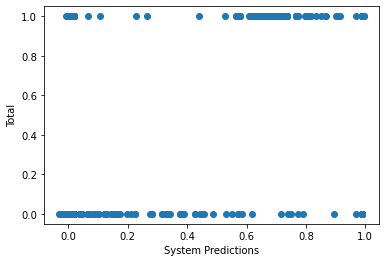

In [285]:
plt.scatter(test_predictions1,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

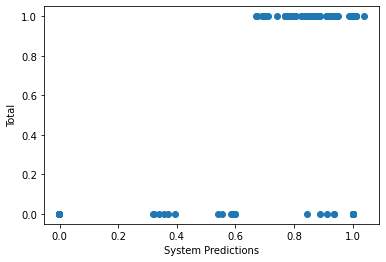

In [286]:
plt.scatter(test_predictions2,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

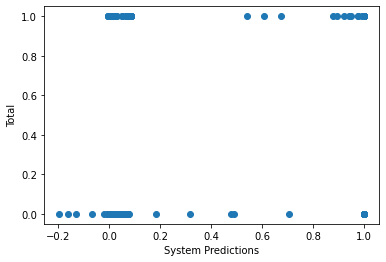

In [287]:
plt.scatter(test_predictions3,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

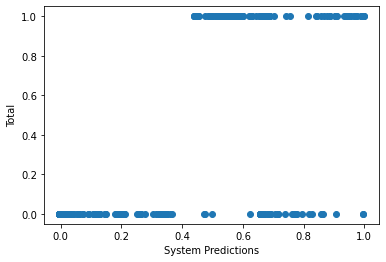

In [288]:
plt.scatter(test_predictions_mean,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


(array([2.7305e+04, 9.0000e+00, 7.0000e+00, 9.0000e+00, 4.0000e+00,
        3.0000e+00, 4.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 1.4000e+01, 1.0000e+01, 2.4000e+01, 2.2000e+01,
        1.1000e+01, 6.0000e+00, 3.0000e+00, 4.0000e+00, 2.8375e+04]),
 array([-0.02998875,  0.02125   ,  0.07248875,  0.12372752,  0.17496626,
         0.22620502,  0.27744377,  0.3286825 ,  0.3799213 ,  0.43116003,
         0.48239878,  0.5336375 ,  0.5848763 ,  0.6361151 ,  0.6873538 ,
         0.73859257,  0.7898313 ,  0.84107006,  0.89230883,  0.94354755,
         0.9947863 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2bdbe2b5bc8>])

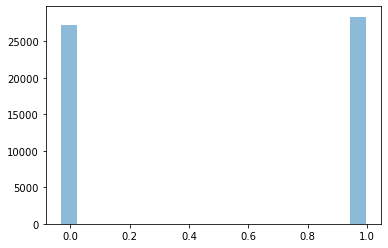

In [289]:
plt.hist(test_predictions1,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([2.7321e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 5.0000e+00, 2.0000e+00, 6.0000e+00, 4.0000e+00,
        9.0000e+00, 1.6000e+01, 1.2000e+01, 1.3000e+01, 2.8432e+04]),
 array([-6.2060956e-04,  5.1327080e-02,  1.0327477e-01,  1.5522246e-01,
         2.0717014e-01,  2.5911784e-01,  3.1106552e-01,  3.6301321e-01,
         4.1496089e-01,  4.6690860e-01,  5.1885629e-01,  5.7080400e-01,
         6.2275165e-01,  6.7469937e-01,  7.2664702e-01,  7.7859473e-01,
         8.3054245e-01,  8.8249010e-01,  9.3443781e-01,  9.8638546e-01,
         1.0383332e+00], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2bdccae3dc8>])

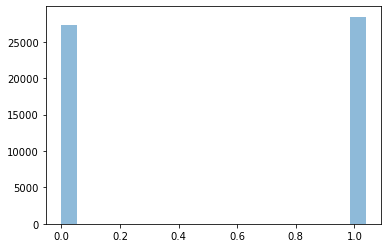

In [290]:
plt.hist(test_predictions2,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 2.7233e+04, 1.9400e+02,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.8385e+04]),
 array([-0.1960513 , -0.13627473, -0.07649817, -0.0167216 ,  0.04305498,
         0.10283154,  0.16260812,  0.22238468,  0.28216124,  0.3419378 ,
         0.40171438,  0.46149096,  0.52126753,  0.5810441 ,  0.6408207 ,
         0.7005972 ,  0.7603738 ,  0.8201504 ,  0.8799269 ,  0.9397035 ,
         0.99948007], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2bdca6634c8>])

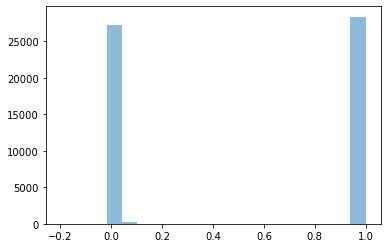

In [291]:
plt.hist(test_predictions3,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([2.7247e+04, 8.0000e+00, 8.0000e+00, 1.0000e+01, 5.0000e+00,
        8.0000e+00, 4.2000e+01, 6.0000e+00, 4.0000e+00, 1.1000e+01,
        2.0000e+01, 2.8000e+01, 1.1000e+01, 9.0000e+01, 7.0000e+00,
        6.0000e+00, 5.0000e+00, 8.0000e+00, 8.0000e+00, 2.8296e+04]),
 array([-0.00417974,  0.04593606,  0.09605186,  0.14616767,  0.19628346,
         0.24639927,  0.29651508,  0.34663087,  0.39674667,  0.44686246,
         0.49697828,  0.54709405,  0.5972099 ,  0.6473257 ,  0.69744146,
         0.7475573 ,  0.7976731 ,  0.8477889 ,  0.8979047 ,  0.94802046,
         0.9981363 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x2bdc8b9d8c8>])

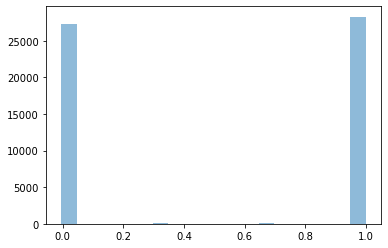

In [292]:
plt.hist(test_predictions_mean,bins=20, density=False, alpha=0.5,histtype='stepfilled')